# CAPSTONE PROJECT: CREDIT CARD FRAUD DETECTION
## GROUP 3

##### TEAM MEMEBERS:
Anukriti Baijal, Harvendra Singh, Theodore Smith

##### Description:
The aim of this project is to analyze a dataset related to fraudulent transactions from different cities in the United States and build predictive models.


In [1]:
# Copy the below comment and run it on Terminal to download the required library
# pip install -U imbalanced-learn

In [45]:
# Importing important libraries and python script
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import Capstone_Group3 as ps
import bokeh as bk
import copy

In [3]:
# Read the dataset
df = pd.read_csv("fraudTest.csv", header=0, sep=',')

# Displaying first few rows of the dataset
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


### Data Cleaning and Pre-processing 

In [4]:
# Checking and displaying columns and number of missing values
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
# Display data types of columns
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [6]:
# Split the datetime column into separate date and time columns
df[['trans_date', 'trans_time']] = df['trans_date_trans_time'].str.split(' ', n=1, expand=True)

# Converting 'trans_date' into date column
df['trans_date'] = ps.convert_date_time(df, "date", 'trans_date')

# Converting 'trans_time' into date column
df['trans_time'] = ps.convert_date_time(df, "time", 'trans_time')

# Converting 'dob' into date column
df['dob'] = ps.convert_date_time(df, "date", 'dob')

In [7]:
# Trim leading and trailing spaces in "first" and "last" columns
df['first'] = df['first'].str.strip()
df['last'] = df['last'].str.strip()

# Concatenate "first" and "last" columns into a new column "name"
df['name'] = df['first'] + ' ' + df['last']

# Trim leading and trailing spaces in the "name" column
df['name'] = df['name'].str.strip()

In [8]:
# Cleaning the 'merchant' column
df['merchant'] = ps.clean(df, 'fraud_', 'merchant')

# Triming leading spaces
df['merchant'] = df['merchant'].str.strip()

# Cleaning the 'category' column
df['category'] = ps.clean(df, '_', 'category')

In [9]:
# Converting the values into the provider name
df['cc_provider'] = ps.cc_provider(df, 'cc_num')

In [10]:
# Getting the age group of the customers
# Last date of the year in consideration
last_date=pd.to_datetime('2020-12-31', format='%Y-%m-%d').date()

# Calculating the age in years
df['age']=(last_date - df['dob']).dt.days // 365

# Age group of the customers
df['age_group']=df['age'].apply(ps.age_group)

In [11]:
# Renaming the columns
new_column_names={'amt':'Amount','first':'First_Name','last':'Last_Name'}

In [12]:
# Dropping redundant columns
df.drop(['first', 'last','trans_date_trans_time','Unnamed: 0','trans_date_trans_time'], axis=1, inplace=True)
df

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,name,cc_provider,age,age_group
0,2291163933867244,Kirlin and Sons,personal care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,...,1371816865,33.986391,-81.200714,0,2020-06-21,12:14:25,Jeff Elliott,Mastercard,52,41-65 years
1,3573030041201292,Sporer-Keebler,personal care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,...,1371816873,39.450498,-109.960431,0,2020-06-21,12:14:33,Joanne Williams,American Express,30,26-40 years
2,3598215285024754,"Swaniawski, Nitzsche and Welch",health fitness,41.28,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,...,1371816893,40.495810,-74.196111,0,2020-06-21,12:14:53,Ashley Lopez,American Express,50,41-65 years
3,3591919803438423,Haley Group,misc pos,60.05,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,...,1371816915,28.812398,-80.883061,0,2020-06-21,12:15:15,Brian Williams,American Express,33,26-40 years
4,3526826139003047,Johnston-Casper,travel,3.19,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,...,1371816917,44.959148,-85.884734,0,2020-06-21,12:15:17,Nathan Massey,American Express,65,41-65 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,Reilly and Sons,health fitness,43.77,M,558 Michael Estates,Luray,MO,63453,40.4931,...,1388534347,39.946837,-91.333331,0,2020-12-31,23:59:07,Michael Olson,American Express,54,41-65 years
555715,3556613125071656,Hoppe-Parisian,kids pets,111.84,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,...,1388534349,29.661049,-96.186633,0,2020-12-31,23:59:09,Jose Vasquez,American Express,21,19-25 years
555716,6011724471098086,Rau-Robel,kids pets,86.88,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,...,1388534355,46.658340,-119.715054,0,2020-12-31,23:59:15,Ann Lawson,Discover,39,26-40 years
555717,4079773899158,Breitenberg LLC,travel,7.99,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,...,1388534364,44.470525,-117.080888,0,2020-12-31,23:59:24,Eric Preston,Visa,55,41-65 years


### Data Exploration 

In [13]:
# Summary statistics for numerical columns
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860,46.675822
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008,17.431057
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000,15.000000
25%,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000,33.000000
50%,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000,45.000000
75%,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000,58.000000
max,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000,96.000000


In [14]:
# Get the number of fraud transactions (counts) for each customer
name_counts = df['name'].value_counts()

# Displayong the top 10 customers with most reported fraud transactions
print("Top 10 customers with most reported fraud transactions:\n",name_counts.head(10))

Top 10 customers with most reported fraud transactions:
 Scott Martin         1965
Jeffrey Smith        1526
Gina Grimes          1474
Michelle Gregory     1466
Carrie Washington    1462
Amber Lewis          1458
Samuel Jenkins       1428
Andrew Patterson     1426
Lori Ramirez         1403
Lisa Lin             1386
Name: name, dtype: int64


In [15]:
# Get the number of fraud transactions (counts) for each merchant
merchant_counts = df['merchant'].value_counts()

# Displayong the top 10 merchants with most reported fraud transactions
print("Top 10 merchants with most reported fraud transactions:\n",merchant_counts.head(10))

Top 10 merchants with most reported fraud transactions:
 Kilback LLC                 1859
Cormier LLC                 1597
Schumm PLC                  1561
Kuhn LLC                    1521
Dickinson Ltd               1519
Boyer PLC                   1506
Emard Inc                   1226
Parisian and Sons           1202
Corwin-Collins              1178
Streich, Hansen and Veum    1168
Name: merchant, dtype: int64


In [16]:
# Get the number of fraud transactions (counts) for each category
category_counts = df['category'].value_counts()

# Displayong the top 10 category with most reported fraud transactions
print("Top 10 categories with most reported fraud transactions:\n",category_counts.head(10))

Top 10 categories with most reported fraud transactions:
 gas transport     56370
grocery pos       52553
home              52345
shopping pos      49791
kids pets         48692
shopping net      41779
entertainment     40104
personal care     39327
food dining       39268
health fitness    36674
Name: category, dtype: int64


In [17]:
# Get the number of fraud transactions (counts) for job class
job_counts = df['job'].value_counts()

# Displayong the top 10 job classes with most reported fraud transactions
print("Top 10 Job classes with most reported fraud transactions:\n",job_counts.head(10))

Top 10 Job classes with most reported fraud transactions:
 Film/video editor             4119
Exhibition designer           3968
Surveyor, land/geomatics      3756
Naval architect               3750
Designer, ceramics/pottery    3463
Materials engineer            3441
Environmental consultant      3427
Financial adviser             3304
IT trainer                    3264
Systems developer             3262
Name: job, dtype: int64


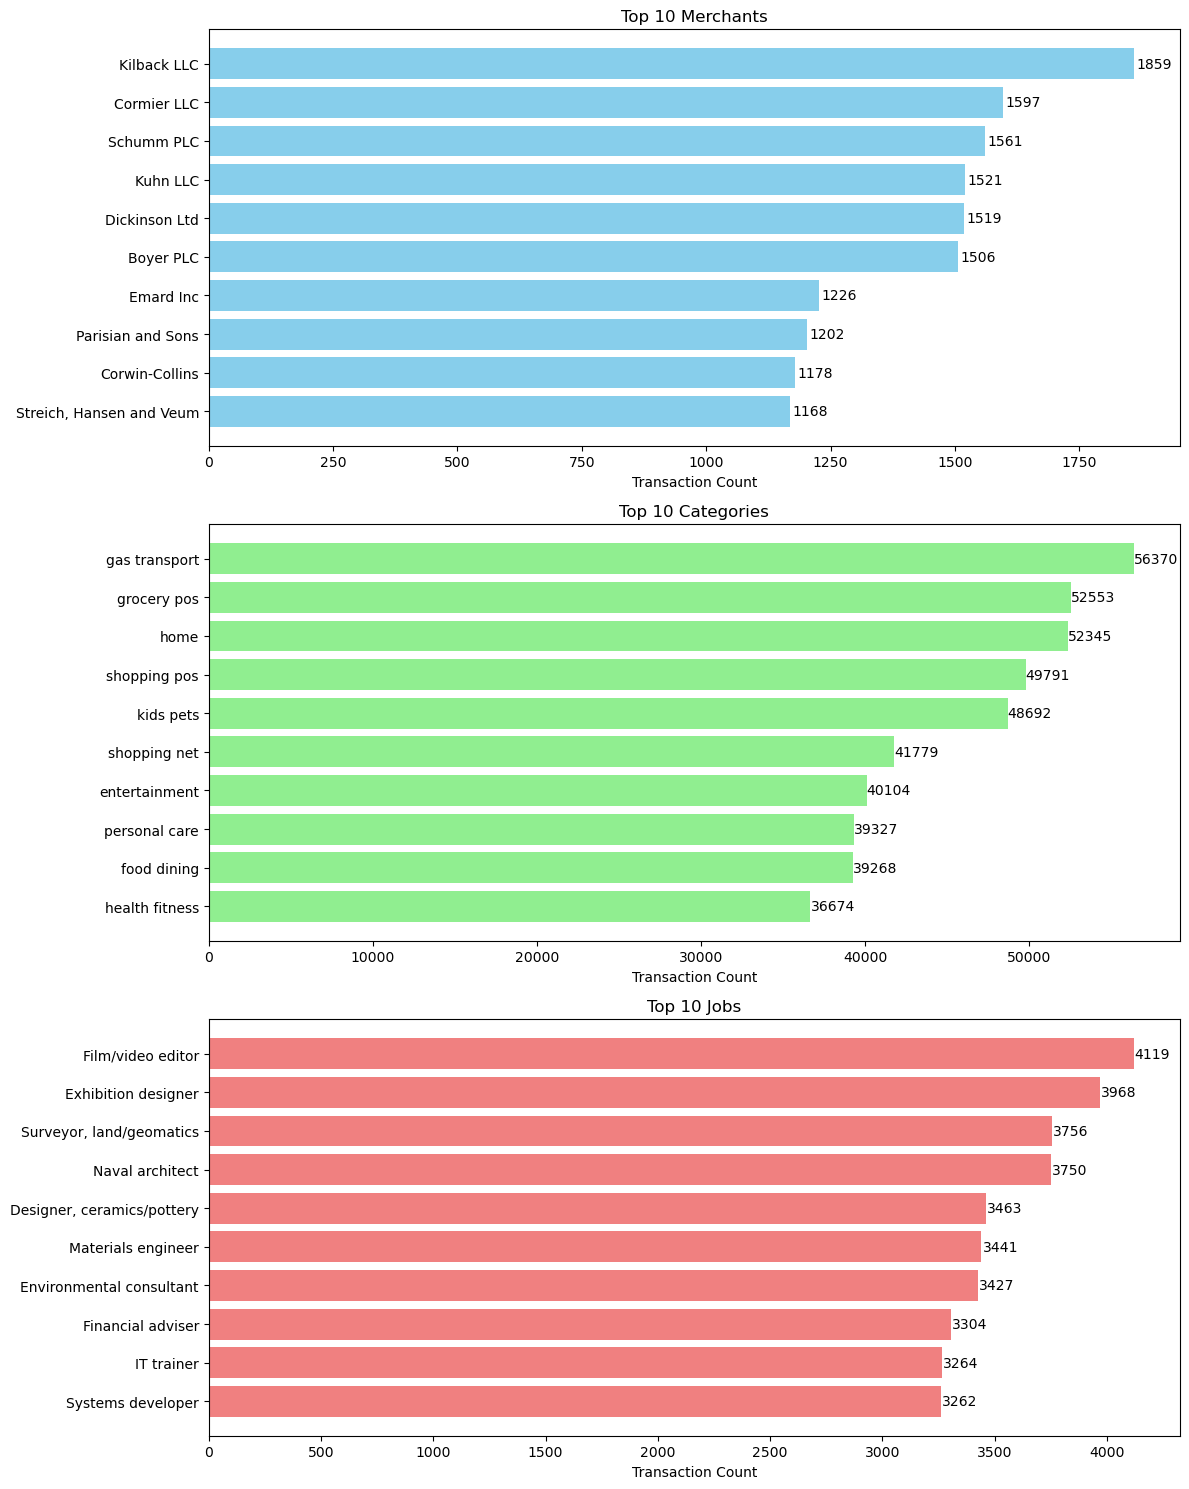

In [18]:
# Create canvas for subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# Get the counts of each merchant, category, and job
merchant_counts = df['merchant'].value_counts().head(10)
category_counts = df['category'].value_counts().head(10)
job_counts = df['job'].value_counts().head(10)

# Plot top 10 merchants as horizontal bar chart in descending order
ax1.barh(merchant_counts.index[::-1], merchant_counts[::-1], color='skyblue')
ax1.set_title('Top 10 Merchants')
ax1.set_xlabel('Transaction Count')

# Display count numbers on right of the bars
for i, v in enumerate(merchant_counts[::-1]):
    ax1.text(v + 5, i, str(v), ha='left', va='center')

# Plot top 10 categories as horizontal bar chart in descending order
ax2.barh(category_counts.index[::-1], category_counts[::-1], color='lightgreen')
ax2.set_title('Top 10 Categories')
ax2.set_xlabel('Transaction Count')

# Display count numbers on right of the bars
for i, v in enumerate(category_counts[::-1]):
    ax2.text(v + 5, i, str(v), ha='left', va='center')

# Plot top 10 jobs as horizontal bar chart in descending order
ax3.barh(job_counts.index[::-1], job_counts[::-1], color='lightcoral')
ax3.set_title('Top 10 Jobs')
ax3.set_xlabel('Transaction Count')

# Display count numbers on right of the bars
for i, v in enumerate(job_counts[::-1]):
    ax3.text(v + 5, i, str(v), ha='left', va='center')

# Adjust layout
plt.tight_layout()

# Show the combined chart
plt.show()

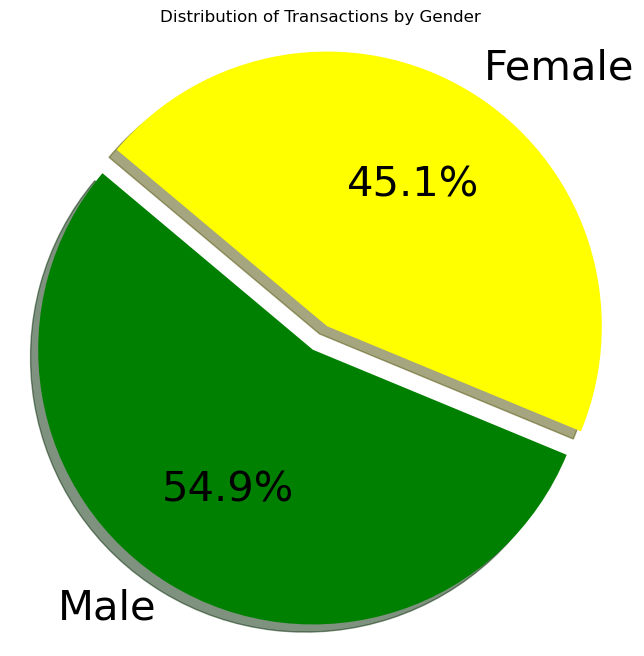

In [19]:
# Setting the labels, sizes and colors for the pie chart
labels = 'Male', 'Female'
sizes = df['gender'].value_counts()
colors = ['green', 'yellow']

# Explode 1st slice of the pie chart
explode = (0.1, 0)  

# Plot the pie chart , where the slices will be ordered and plotted counter-clockwise
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 3 * plt.rcParams['font.size']}, shadow=True, startangle=140)

# Setting axis as 'Equal' ensuring that the pie is drawn as a circle
plt.axis('equal')  

# Displaying the pie chart
plt.title('Distribution of Transactions by Gender')
plt.show()

In [20]:
# Get aggregate values for each category group
df.groupby('category').amt.agg(['count', 'min', 'max', 'mean', 'sum' ])

,count,min,max,mean,sum
category,,,,,
entertainment,40104,1.00,801.44,63.984840,2566048.02
food dining,39268,1.00,544.27,50.777938,1993948.08
gas transport,56370,5.53,147.11,63.577001,3583835.56
grocery net,19426,1.07,178.44,53.731667,1043791.37
grocery pos,52553,10.74,392.00,115.885327,6090121.59
health fitness,36674,1.00,594.17,53.867432,1975534.19
home,52345,1.00,507.05,57.995413,3035769.89
kids pets,48692,1.01,555.05,57.506913,2800126.59
misc net,27367,1.00,2802.29,78.600237,2151052.68


In [21]:
# Get aggregate values for each gender group
df.groupby('gender').amt.agg(['count', 'min', 'max', 'mean', 'sum' ])

,count,min,max,mean,sum
gender,,,,,
F,304886,1.0,22768.11,69.388905,21155705.55
M,250833,1.0,19364.91,69.397558,17407197.56


Note: Notice how the means for both genders is off by only one penny. 

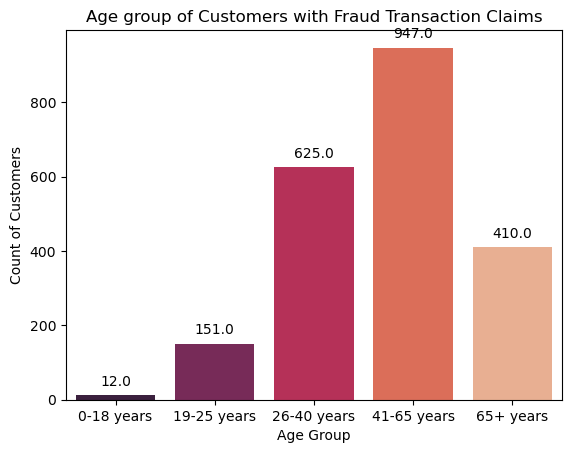

In [82]:
# Getting the count of different age groups
age_group_counts = df[df['is_fraud'] == 1]['age_group'].value_counts()

# Sort the age groups in increasing order
age_group_counts = age_group_counts.sort_index()

# Bar plot to display total number of customers belonging to different age groups
ax = sns.barplot(x=age_group_counts.index, y=age_group_counts, palette="rocket", linewidth=10)

# Annotate values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adding title, x-axis label, and y-axis label to the plot
plt.title("Age group of Customers with Fraud Transaction Claims")
plt.xlabel("Age Group")
plt.ylabel("Count of Customers")

# Display the plot
plt.show()

**The '41-65' age group is the most vulnerable as this age group has reported the most number of fraud transactions.**

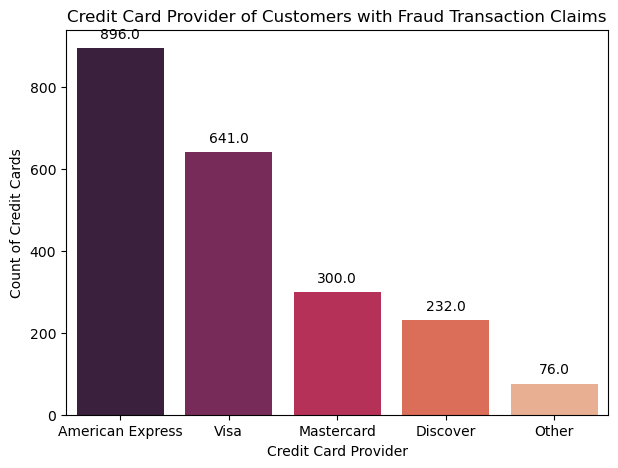

In [23]:
# Getting the count of different credit card providers
cc_provider_count=df[df['is_fraud']==1]['cc_provider'].value_counts()

# Setting the plot dimensions
plt.figure(figsize=(7,5))

# Bar plot to display total number of customers using different credit card providers
ax=sns.barplot(x=cc_provider_count.index, y=cc_provider_count, palette="rocket", linewidth=10)

# Annotate values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
# Adding title, x-label and y-label to the plot
plt.title("Credit Card Provider of Customers with Fraud Transaction Claims")
plt.ylabel("Count of Credit Cards")
plt.xlabel("Credit Card Provider")

# Display the plot
plt.show()

**AMEX Credit Card holders have dealt with most fraud transactions.**

In [24]:
# Get aggregate values for city and city population using 'is_fraud' column
fraud_stats = df.groupby(['city','city_pop'])['is_fraud'].agg(['sum', 'count']).reset_index()
fraud_stats.rename(columns={'sum': 'Fraud_Count', 'count': 'Total_Transactions'}, inplace=True)

# Calculate fraud rate
fraud_stats['Fraud_Rate'] = round((fraud_stats['Fraud_Count'] / fraud_stats['Total_Transactions'])*100,2)

# Calculate fraud rate per city population
fraud_stats['Fraud_Rate_Population'] = round((fraud_stats['Fraud_Rate'] / fraud_stats['city_pop'])*100,2)

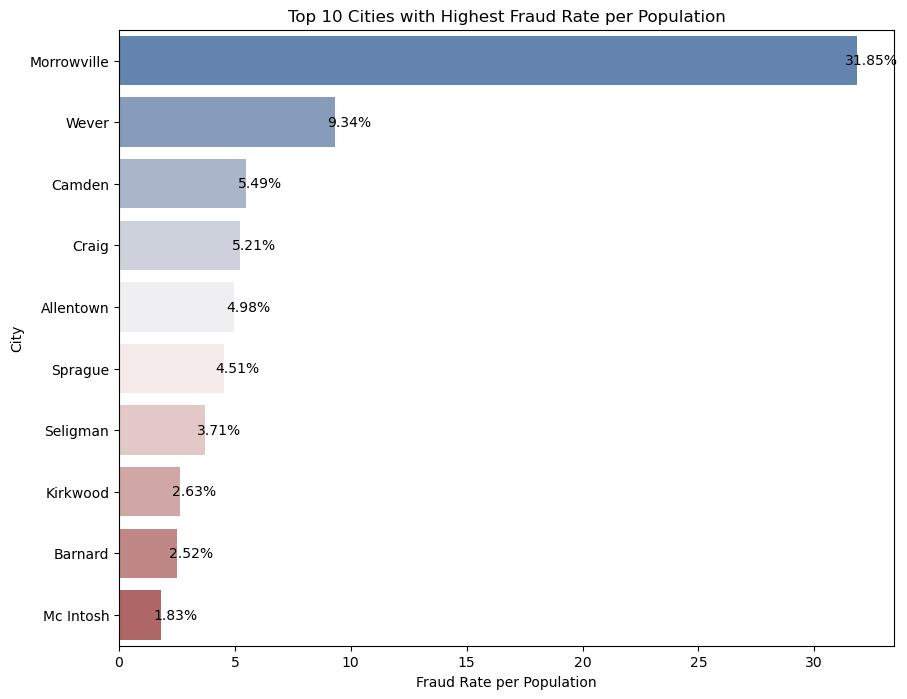

In [25]:
# Sorting fraud_stats by 'Fraud_Rate_Population' in descending order
sorted_fraud_stats = fraud_stats.sort_values(by='Fraud_Rate_Population', ascending=False)

# Taking the top 10 rows
top10_cities = sorted_fraud_stats.head(10)

# Setting the plot dimensions
plt.figure(figsize=(10, 8))

# Bar plot to display the top 10 cities with highest fraud rate per population
ax = sns.barplot(x=top10_cities['Fraud_Rate_Population'], y=top10_cities['city'], palette="vlag", linewidth=10)

# Annotate values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')
    
# Adding title, x-label and y-label to the plot
plt.title("Top 10 Cities with Highest Fraud Rate per Population")
plt.xlabel("Fraud Rate per Population")
plt.ylabel("City")

# Display the plot
plt.show()

/var/folders/vt/xtf4xch13wd2dgjs5b9915zr0000gn/T/ipykernel_65538/1100727498.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


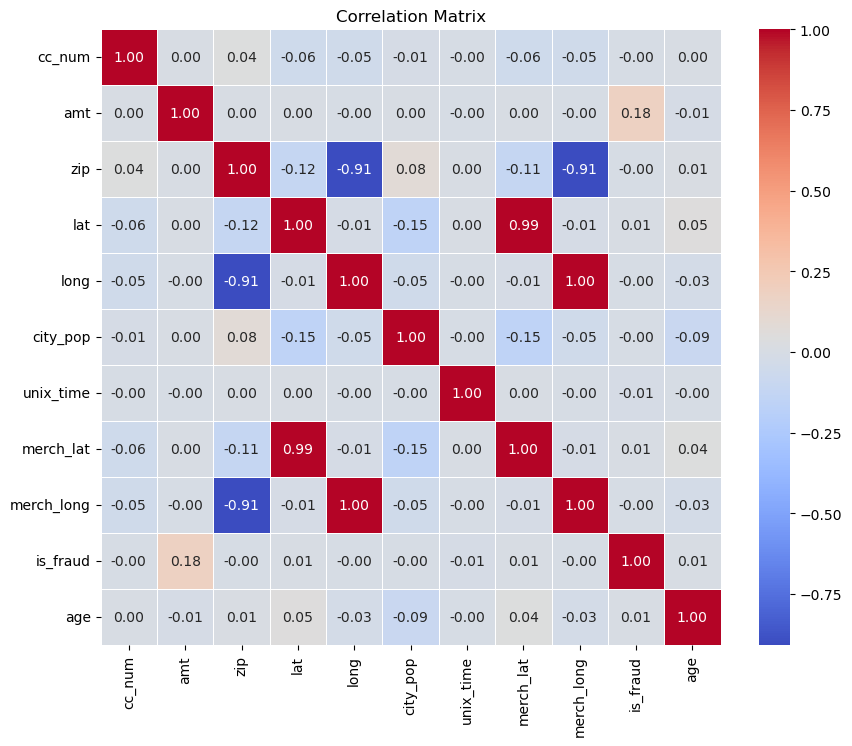

In [26]:
# Correlation Matrix
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Model Building

In [27]:
# Checking if the data is imbalance
df['is_fraud'].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

**As can be observed, the dataset is imbalanced.
This Imbalance will be handled using Under Sampling Technique**

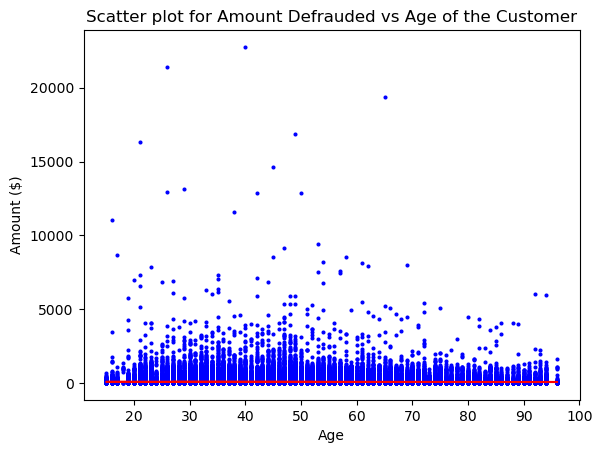

In [81]:
# Scatter plot
plt.scatter(df2['age'], df2['amt'], c='blue', marker='.', s=15)  # Use 's' for markersize

# Linear fit
m, b = np.polyfit(df2['age'], df2['amt'], 1)
plt.plot(df2['age'], m*x + b, color='red')

plt.xlabel("Age")
plt.ylabel("Amount ($)")
plt.title("Scatter plot for Amount Defrauded vs Age of the Customer")
plt.show()

In [28]:
# Copying the dataframe to avoid changes in the main dataframe
df2=copy.deepcopy(df)

### Model 1: Logistic Regression

In [85]:
# Declaring the independent features and target variable for the model
x = df2[['age']]
y = df2['is_fraud']

In [86]:
# Handling imbalanced dataset using Random Under Sampling Menthod
from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomUnderSampler
randomsample = RandomUnderSampler(random_state=50)

# Perform under-sampling
feature_resample, target_resample = randomsample.fit_resample(features, target)

# Create a new DataFrame with the resampled data
resampled_df2 = pd.concat([pd.DataFrame(feature_resample, columns=features.columns), pd.DataFrame(target_resample, columns=['is_fraud'])], axis=1)

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(feature_resample, target_resample, test_size=0.2, random_state=50)

# Initialize the logistic regression model
model2 = LogisticRegression(random_state=50)

# Fit the model to the training data
model2.fit(x_train, y_train)

# Make predictions on the test set
prediction2 = model2.predict(x_test)

In [99]:
# Accuracy of the prediction
print("Accuracy (Logistic Regression):", round((accuracy_score(y_test, prediction2)*100),2),"%")

Accuracy (Logistic Regression): 85.78 %


In [100]:
# Classification report of the prediction
print("Classification Report (Logistic Regression):\n", classification_report(y_test, prediction2))

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.80      0.96      0.87       425
           1       0.95      0.76      0.84       433

    accuracy                           0.86       858
   macro avg       0.87      0.86      0.86       858
weighted avg       0.87      0.86      0.86       858



### Model 2: Random Forest 

In [29]:
# Converting categorical columns into numerical using appropriate encoding methods
from sklearn.preprocessing import LabelEncoder

# Applying Frequency encoding to convert 'category' column 
df2['category_encode'] = df2['category'].map(df2['category'].value_counts())

# Applying Target encoding to convert 'merchant' and 'city' columns
df2['merchant_encode'] = df2.groupby('merchant')['is_fraud'].transform('mean')
df2['city_encode'] = df2.groupby('city')['is_fraud'].transform('mean')

# Applying Label encoding to convert 'gender' and 'cc_provider' column
label_encode=LabelEncoder()
df2['gender_encode'] = label_encode.fit_transform(df2['gender'])
df2['cc_provider_encode'] = label_encode.fit_transform(df2['cc_provider'])

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Declaring the independent features and target variable for the model
features = df2[['category_encode','gender_encode','amt','cc_provider_encode','age']]
target = df2['is_fraud']

In [31]:
# Handling imbalanced dataset using Random Under Sampling Menthod
from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomUnderSampler
randomsample = RandomUnderSampler(random_state=50)

# Perform under-sampling
features_resample, target_resample = randomsample.fit_resample(features, target)

# Create a new DataFrame with the resampled data
resampled_df2 = pd.concat([pd.DataFrame(features_resample, columns=features.columns), pd.DataFrame(target_resample, columns=['is_fraud'])], axis=1)

In [38]:
# Splitting the dataset into train(80%) and test(20%)
x_train, x_test, y_train, y_test = train_test_split(features_resample, target_resample, test_size=0.2, random_state=50)

# Training and fiting the model
model = RandomForestClassifier(n_estimators=100, random_state=50)
model.fit(x_train, y_train)

# Predicting using the model
prediction = model.predict(x_test)

In [101]:
# Accuracy of the prediction Undersampling
print("Accuracy (Random Forest):", round((accuracy_score(y_test, prediction)*100),2),"%")

Accuracy (Random Forest): 95.45 %


In [102]:
# Classification report of the prediction
print("Classification Report (Random Forest):\n", classification_report(y_test, prediction))

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       425
           1       0.96      0.95      0.95       433

    accuracy                           0.95       858
   macro avg       0.95      0.95      0.95       858
weighted avg       0.95      0.95      0.95       858



### Model 3: Support Vector Machine (SVM)

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Declaring the independent features and target variable for the model
features = df2[['merchant_encode','city_encode','gender_encode','amt','cc_provider_encode','age']]
target = df2['is_fraud']

In [95]:
# Handling imbalanced dataset using Random Under Sampling Menthod
from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomUnderSampler
randomsample = RandomUnderSampler(random_state=50)

# Perform under-sampling
features_resample, target_resample = randomsample.fit_resample(features, target)

# Create a new DataFrame with the resampled data
resampled_df2 = pd.concat([pd.DataFrame(features_resample, columns=features.columns), pd.DataFrame(target_resample, columns=['is_fraud'])], axis=1)

In [96]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features_resample, target_resample, test_size=0.2, random_state=50)

# Initialize the SVM classifier
svm_classifier = SVC(random_state=50)

# Fit the model to the training data
svm_classifier.fit(x_train, y_train)

# Make predictions on the test set
prediction3 = svm_classifier.predict(x_test)

In [103]:
# Accuracy of the prediction Undersampling
print("Accuracy (SVM):", round((accuracy_score(y_test, prediction3)*100),2),"%")

Accuracy (SVM): 86.13 %


In [104]:
# Classification report of the prediction
print("Classification Report (SVM):\n", classification_report(y_test, prediction3))

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.80      0.96      0.87       425
           1       0.96      0.76      0.85       433

    accuracy                           0.86       858
   macro avg       0.88      0.86      0.86       858
weighted avg       0.88      0.86      0.86       858

